<h1> Project: Investigate a Dataset (Analyze No-Show appointments)</h1>

<h3> Table of Contents</h3>
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#investigate">Data Wrangling</a></li>
    <li><a href="#clean">Data Cleaning</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
<h3>Introduction</h3>

For this project, I will be analyzing no-show appointment data from Kaggle, looking to determine if there are any factors that can predict a patients propensity to fail to show up for their scheduled appointment.  This data set is comprised of information from 100k medical appointments in Brazil for 2016.  Key columns include;  
<ul>
    <li>Neighborhood: the location of the hospital for the appointment</li>
    <li>Scholarship: indicates whether or not the patient is enrolled in the Brasilian welfare program</li>
    <li>Ailments: indicates whether or not the patient has any specific ailments</li>
    <li>No-Show: indicates if the customer showed up for thier appointment or not</li>
</ul>

I will be looking to answer the following questions
<ol>
    <li><a href="#eda_q1">What was the overall no show percentage?</a></li>
    <li><a href="#eda_q2">Which gender has a higher no show rate?</a></li>
    <li><a href="#eda_q3">Does receiving a sms message decrease the no show rate?</a></li>
    <li><a href="#eda_q4">What is the no show rate for patients on scholarship?</a></li>
    <li><a href="#eda_q5">What is the no show rate for patients with specified illnesses</a></li>
    <li><a href="#eda_q6">How does age effect no show rates?</a></li>
</ol>
    

In [358]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='investigate'></a>
<h3>Investigate Data</h3>

In this section i will be checking the data for issues and trimming the datatet for futher analysis.  Any issues found will be notated in <font color = "Red">red</font> font to be compiled at the end of this section.

In [359]:
# Load data and view table header
df = pd.read_csv('noshow_appts.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<b><u><font color='red'>Issues found in dataset</font></u></b>
<ul>
    <li><i>PatientId</i> and <i>AppointmentID</i> columns may not be needed - will need to scan for duplicates</li>
    <li><i>Neighbourhood</i>, <i>Hipertension</i>, and <i>Handcap</i> column labels are spelled incorrectly</li>
    <li><i>No-Show</i> needs to have the dash removed and replaced with an underscore</li>
    <li>Change all column labels to lowercase for uniformity</li>
</ul>    

In [360]:
print ("Rows: ", df.shape[0])
print ("Columns: ", df.shape[1])

Rows:  110527
Columns:  14


In [361]:
# check for NULL values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

<b><font color="Green">No NULL values found in dataset</font></b>

In [362]:
# check datatypes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

<b><u><font color='red'>Issues found in datatypes</font></u></b>
<ul>
    <li>ScheduleDay and AppointmentDay need to be changed to date format</li>
    <li>No-show column needs to change from y/n to 1/0 values</li>
</ul>    

In [363]:
# check for duplicate rows
sum(df.duplicated())

0

<b><font color="Green">No duplicate rows found in dataset</font></b>

In [364]:
# check for duplicate appointment Ids
sum(df.AppointmentID.duplicated())

0

<b><font color="Green">No duplicate appointment ids found in dataset</font></b>

In [365]:
#check tablestats
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<b><u><font color='red'>Issues found in table stats</font></u></b>
<ul>
    <li>Maximum age is 115 which is extremely rare</li>
    <li>Minimum age is negative which is impossible</li>
    <li>Handicap is not listed 0/1 like the other ailments, looks like its 0, 1, 2, 3, or 4.  Will need to convert this to a 0/1 value for the column</li>
</ul>    

In [366]:
# check all patients with ages less than 0

df[df['Age'] <0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


<b><u><font color='red'>Issues found</font></u></b>
<ul>
    <li>There is only one record with a negative age.  Will delete this record</li>
</ul>

Text(0.5, 1.0, 'age distribution of patients')

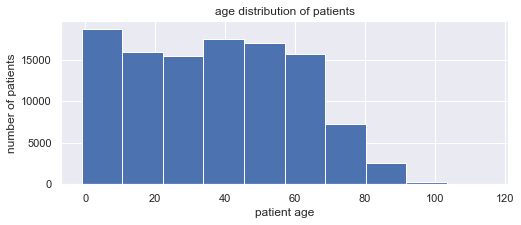

In [367]:
# Distribution of 'age' column to determine max age range
plt.figure(figsize=(8,3));
age_hist = df['Age'].plot.hist(bins=10)
age_hist.set_xlabel("patient age")
age_hist.set_ylabel("number of patients")
age_hist.set_title('age distribution of patients')

<b><u><font color='red'>Issues found</font></u></b>
<ul>
    <li>There is an extremely small quantity of customers over 100 years old, therefore will remove any customer 100 or older</li>
</ul>

<a id='clean'></a>
<h3>Cleaning Data</h3>

<h6><b>After checking all of the data, the following fixes are needed to clean the dataset for analysis</b></h6>
<ol>
    <li>Drop PatientId and AppointmentId columns</li>
    <li>Fix column labels for neighbourhood, hipertension, handcap, and No-show</li>
    <li>Change all column lables to lowercase</li>
    <li>Values in ScheduleDay and AppointmentDay need to be changed to date format</li>
    <li>No-show column needs to change from y/n to 1/0 values</li>
    <li>Remove patients with either a negative age or 100 years and older</li>
    <li>Fix Hanicap column - change to 1/0 values</li>
</ol)

In [368]:
# cleaning step 1z: Drop PatientId and AppointmentId columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# verify columns were removed
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<font color = "green"><b>Cleaning Step 1 - SUCCESSFUL!</b></font>

In [369]:
# cleaning step 2: fix spelling in column labels
df.rename(columns={'Neighbourhood':'Neighborhood', 'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'No_show'}, inplace=True)

# verify column labels were changed
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


<font color = "green"><b>Cleaning Step 2 - SUCCESSFUL!</b></font>

In [370]:
# cleaning step 3: change column labels to lower case
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

# verify column labels were changed
df.head(0)

,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


<font color = "green"><b>Cleaning Step 3 - SUCCESSFUL!</b></font>

In [371]:
# cleaning step 4: change date format for date columns
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# strip time from date columns
df['scheduledday'] = df['scheduledday'].apply(lambda x: x.strftime('%m-%d-%Y')) 
df['appointmentday'] = df['appointmentday'].apply(lambda x: x.strftime('%m-%d-%Y')) 

# verify column formats were changed
df.head(2)

,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,04-29-2016,04-29-2016,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,0,0,0,0,0,No


<font color = "green"><b>Cleaning Step 4 - SUCCESSFUL!</b></font>

In [372]:
# cleaning step 5: replace yes/no values in no_show to 1/0 values
df.no_show[df['no_show'] == 'Yes'] = '1'
df.no_show[df['no_show'] == 'No'] = '0'
df['no_show'] = pd.to_numeric(df['no_show'])

#verify that values were changed
df.head()

/Users/chris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,04-29-2016,04-29-2016,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,04-29-2016,04-29-2016,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,04-29-2016,04-29-2016,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<font color = "green"><b>Cleaning Step 5 - SUCCESSFUL!</b></font>

In [373]:
# cleaning step 6: Remove patients with either a negative age or 100 years and older
df = df[(df.age >= 0) & (df.age <=90)]

min_age = df['age'].min()
max_age = df['age'].max()
print("The age range now only includes ages from {} to {}.".format(min_age, max_age))

The age range now only includes ages from 0 to 90.


<font color = "green"><b>Cleaning Step 6 - SUCCESSFUL!</b></font>

<h3><font color = "green">Data is now cleaned and ready for analysis!!</font></h3>

In [374]:
# cleaning step 7: Fix Hanicap column - change to 1/0 values
df['handicap'] = df['handicap'].map({0:0, 1:1, 2:1, 3:1, 4:1})

# recheck valuecounts
df.handicap.value_counts()

0    108007
1      2211
Name: handicap, dtype: int64

<font color = "green"><b>Cleaning Step 7 - SUCCESSFUL!</b></font>

<a id='eda'></a>
<h2>Exploratory Data Analysis</h2>

<a id='eda_q1'></a>
<h3>Question 1 - What was the overall no show percentage?</h3>

In [375]:
# create variables to store no_show values

show_n = df.no_show.sum()
show_tot = df.no_show.count()
show_y = show_tot - show_y
noshow_rate = show_n / show_tot * 100

print("The overall no show rate is:", round(noshow_rate, 2))
print("This will be used as the baseline no Show rate for the analysis")

The overall no show rate is: 20.19
This will be used as the baseline no Show rate for the analysis


<a id='eda_q2'></a>
<h3>Question 2 - Which gender has a higher no show rate?</h3>

gender
F    0.203089
M    0.199798
Name: no_show, dtype: float64


Text(0.5, 1.0, 'No Show rate by gender')

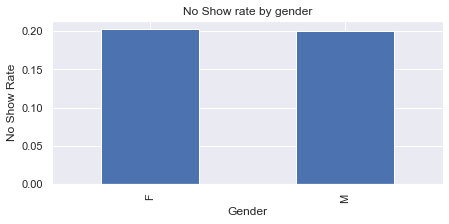

In [376]:
# using group by function to consolidate genders
# lot no show rates by gender

print(df.groupby('gender')['no_show'].mean())
df.groupby('gender')['no_show'].mean().plot(kind='bar',figsize=(7,3));
plt.xlabel("Gender")
plt.ylabel("No Show Rate")
plt.title("No Show rate by gender")

<h4><b><u>Conclusions</u></b></h4>
<ul>
    <li>There does not appear to be any correlation between gender and no show rates</li>
</ul>

<a id='eda_q3'></a>
<h3>Question 3 - Does receiving a sms message decrease the no show rate?</h3>

sms_received
0    0.166932
1    0.275890
Name: no_show, dtype: float64


Text(0.5, 1.0, 'No Show rate by sms_received')

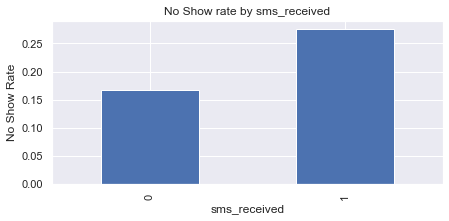

In [377]:
# using group by function to find relations between features
# and then see the relation between Gender and people who showed up and who didn't

print(df.groupby('sms_received')['no_show'].mean())
df.groupby('sms_received')['no_show'].mean().plot(kind='bar',figsize=(7,3));
plt.xlabel("sms_received")
plt.ylabel("No Show Rate")
plt.title("No Show rate by sms_received")

<h4><b><u>Conclusions</u></b></h4>
<ul>
    <li>Patients who receive a sms message are more likely to no show (27.59%) than those who do not receive the sms (16.70%)</li>
</ul>

<a id='eda_q4'></a>
<h3>Question 4 - What is the no show rate for patients on scholarship?</h3>

scholarship
0    0.198064
1    0.237363
Name: no_show, dtype: float64


Text(0.5, 1.0, 'No Show rate by scholarship vs. no scholarship')

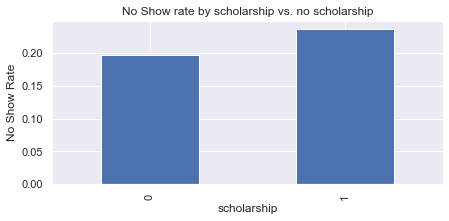

In [378]:
# check no show rates for those on scholarship vs those not on scholarship

print(df.groupby('scholarship')['no_show'].mean())
df.groupby('scholarship')['no_show'].mean().plot(kind='bar',figsize=(7,3));
plt.xlabel("scholarship")
plt.ylabel("No Show Rate")
plt.title("No Show rate by scholarship vs. no scholarship")

<h4><b><u>Conclusions</u></b></h4>
<ul>
    <li>Patients on scholarship are more likely to no show (23.74%) than those who are not (19.81%)</li>
</ul>


<a id='eda_q5'></a>
<h3>Question 5 - What is the no show rate for patients with specified illnesses</h3>

In [379]:
# create second dataframe with only noshows
df_ns = df.query('no_show == 1')

# create variables for each disorder
nsr_hy = df_ns.hypertension.sum() / df.hypertension.sum() * 100
nsr_di = df_ns.diabetes.sum() / df.diabetes.sum() * 100
nsr_al = df_ns.alcoholism.sum() / df.alcoholism.sum() * 100
nsr_hc = df_ns.handicap.sum() / df.handicap.sum() * 100

No show rate for patients with hypertension: 17.26
No show rate for patients with diabetes: 18.0
No show rate for patients with alcoholism: 20.15
No show rate for patients with handicap: 18.05


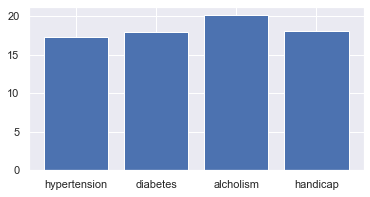

In [380]:
fig = plt.figure(figsize=(6,3))
plt.bar(['hypertension', 'diabetes', 'alcholism', 'handicap'], [nsr_hy, nsr_di, nsr_al, nsr_hc])
print("No show rate for patients with hypertension:", round(nsr_hy, 2))
print("No show rate for patients with diabetes:", round(nsr_di, 2))
print("No show rate for patients with alcoholism:", round(nsr_al, 2))
print("No show rate for patients with handicap:", round(nsr_hc, 2))



<h4><b><u>Conclusions</u></b></h4>
<ul>
    <li>Patients with alcholism have the highest no show rate (20.15%)</li>
    <li>Overall there is not a sizeable difference is no show rate between the different dispostions</li>
    <li>Overall there is not a sizeable difference is no show rate between patients with illnesses vs those without</li>
</ul>

In [381]:
# create second dataframe with only noshows

nsr_hy = df_ns.hypertension.sum() / df.hypertension.sum() * 100
nsr_di = df_ns.diabetes.sum() / df.diabetes.sum() * 100
nsr_al = df_ns.alcoholism.sum() / df.alcoholism.sum() * 100
nsr_hc = df_ns.handicap.sum() / df.handicap.sum() * 100

<a id='eda_q6'></a>
<h3>Question 6 - How does age effect no show rates?</h3>

In [382]:
# create dataframe with only shows
df_s = df.query('no_show == 0')

# find average age of patients who showed up for appointment
age_s = df_s.age.mean()

# find average age of patients who no showed appointment
age_ns = df_ns.age.mean()

print("The average age for patients who showed up was:", round(age_s,2))
print("The average age for patients who no showed:", round(age_ns,2))

The average age for patients who showed up was: 37.64
The average age for patients who no showed: 34.15


<a id='conclusions'></a>
<h2>Conclusions</h2>

<ul>
    <li>The overall no show rate was 20.19</li>
    <li>Gender did not appear to be a factor in determining who will show for an appointment</li>
    <li><font color = "red">Customers who received an SMS message had a higher rate of no shows.</font>  Recommend to elminate this practice in the future</li>
    <li><font color = "red">Patients on scholarship are more likely to no show then those who are not</font></li>
    <li>Patient illness did not appear to be a factor in no show rates</li>
    <li><font color = "red">Age does appear to be a big factor as the mean age for no shows is over 3 years younger than the mean age for those who show up for their appointments</font></li>
</ul>

<h2>Limitations</h2>

<ul>
    <li>The dataset only inluded six months of data.  WOuld have liked to use multiple years to understand if certain times of the year had more no show appointments than normal</li>
    <li>I did remove some records due to anomolies in ages (negative age & ages over 110 years old) </li>
    <li>Data was limited.  As there are many factors (weather, traffic, etc) that could also cause a no show
</ul>

In [383]:
df.to_csv('noshow_appts_final.csv')